In [ ]:
#Installing new libraries, random commands

#!pip install wordcloud
#!pip install TextBlob
#print(sys.executable)

In [382]:
#Basic
import pandas as pd
import numpy as np
import os
import sys
import warnings
#warnings.filterwarnings("ignore")

#Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter

#Text Processing
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

#ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [334]:
#Importing Data
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.shape

(23486, 11)

In [335]:
#Understand data structure
df.info() # need to drop the index 0 column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [336]:
#Preprocessing of df

#drop the index column and clothing id as it is not needed

df.drop(df.columns[[0,1]],inplace=True, axis=1) # inplace=True returns None and not a copy of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


In [337]:
#Check for missing values
df.isnull().sum()

#Review Text has the maximum number of missing values, followed by Div Name, Dept Name and Class Name equally

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
#Now, to understand the general trend of length of reviews, a length column will help with that

df['Review Length'] = df['Review Text'].astype(str).apply(len)

In [ ]:
#I have considered a rating of 3 and above as positive ie 1 and 
# 2 and below as negative ie 0

df['Perception of Product'] = np.where(df['Rating'] >= 3, 1, 0)

In [338]:
#Remove missing values particularly from division name, class name, dept name as it wont aid in analysis.

#The review text column needs to be complete, hence missing values in those are dropped as well

#Title wont be for ML modeling, hence the column will be dropped altogether before ML modeling

for column in ["Class Name","Department Name","Division Name","Review Text"]:
    df = df[df[column].notnull()]
df.isnull().sum() #no more missing values in important columns for analysis

Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [339]:
#Check for unique values
df.nunique()

Age                           77
Title                      13983
Review Text                22621
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

**EDA**


In [340]:
df.describe() #describing new df

Age        Rating  Recommended IND  Positive Feedback Count
count  22628.000000  22628.000000     22628.000000             22628.000000
mean      43.282880      4.183092         0.818764                 2.631784
std       12.328176      1.115911         0.385222                 5.787520
min       18.000000      1.000000         0.000000                 0.000000
25%       34.000000      4.000000         1.000000                 0.000000
50%       41.000000      5.000000         1.000000                 1.000000
75%       52.000000      5.000000         1.000000                 3.000000
max       99.000000      5.000000         1.000000               122.000000

**Visualization**

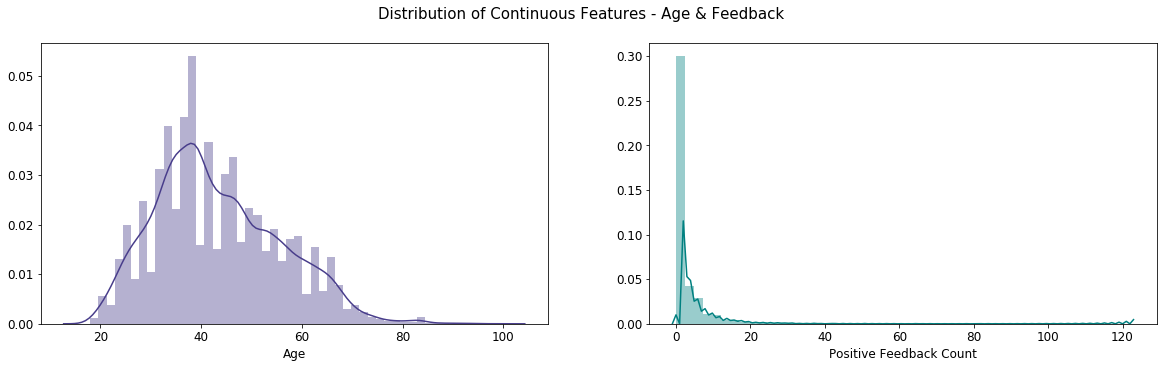

In [346]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(df["Age"], color="darkslateblue", ax=ax[0])
sns.distplot(df["Positive Feedback Count"], color = 'teal', ax=ax[1])
fig.suptitle('Distribution of Continuous Features - Age & Feedback', fontsize=15);

From the distribution of Categorical Variables, it can be seen the the data set is unbalanced as "Recommended IND" has more people recommedning a product that people who dont recommend it.

Hence I shall be using PROCC to understand the ML models better.

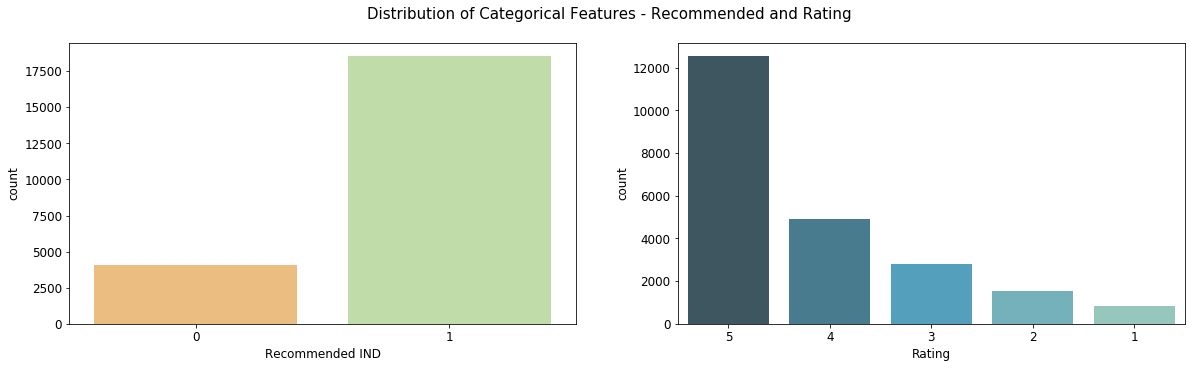

In [357]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.catplot(x="Recommended IND", kind = "count", palette=("Spectral"), data = df, ax=ax[0])
sns.catplot(x="Rating", kind = "count", palette=("GnBu_d"), data = df, order = df.Rating.value_counts().index, ax=ax[1])
fig.suptitle('Distribution of Categorical Features - Recommended and Rating', fontsize=15);
for i in range(2,4): 
    plt.close(i)

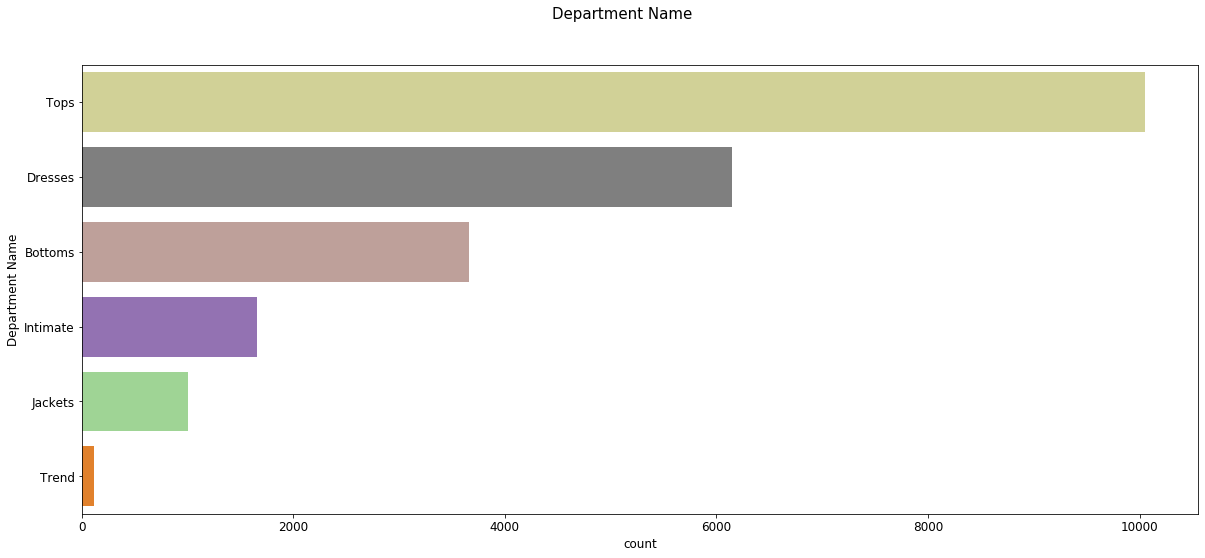

In [376]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.countplot(y="Department Name", palette = "tab20_r",data=df, order=df["Department Name"].value_counts().index)
fig.suptitle('Department Name', fontsize=15);

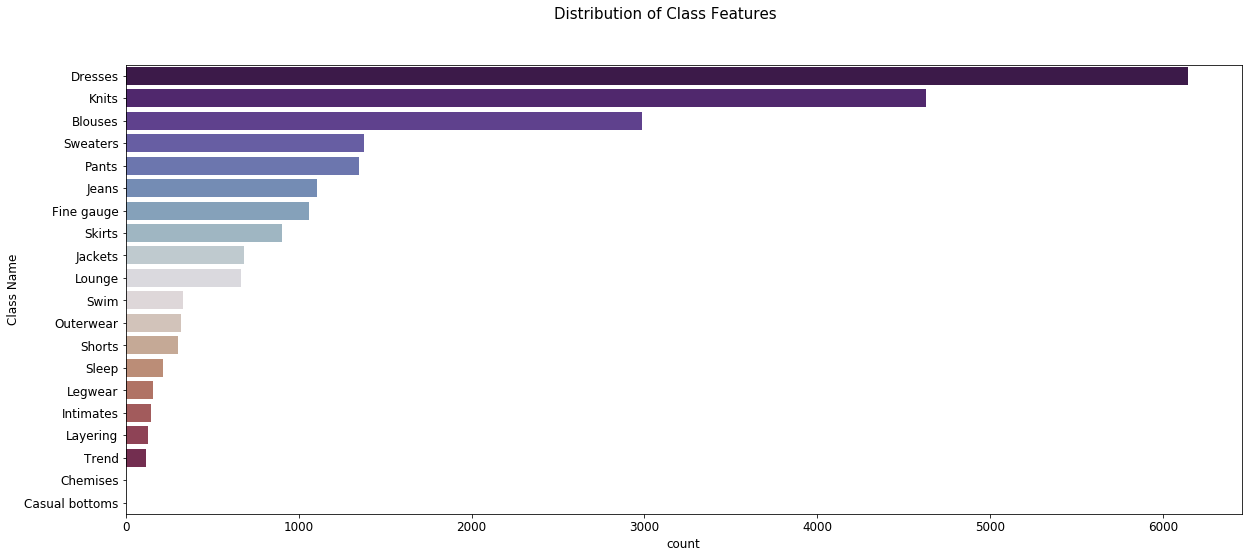

In [381]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.countplot(y="Class Name", palette = "twilight_shifted", data=df, order=df["Class Name"].value_counts().index)
fig.suptitle('Distribution of Class Features', fontsize=15);

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.distplot(df['Review Length'], color = "lightsalmon")
fig.suptitle('Distribution of Review Length', fontsize=15);

In [383]:
sns.countplot(df['Perception of Product']);

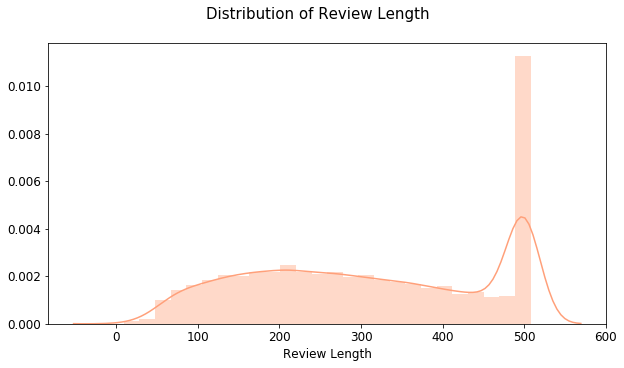

In [395]:
From the chart below, it can be seen that the users who gave a rating of 5 often, often wrote 500 plus word length reviews

In [ ]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Review Length', color = "teal", bins=10);

<Figure size 720x360 with 0 Axes>

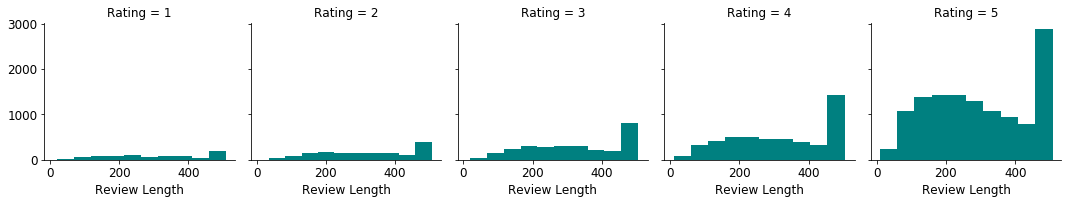

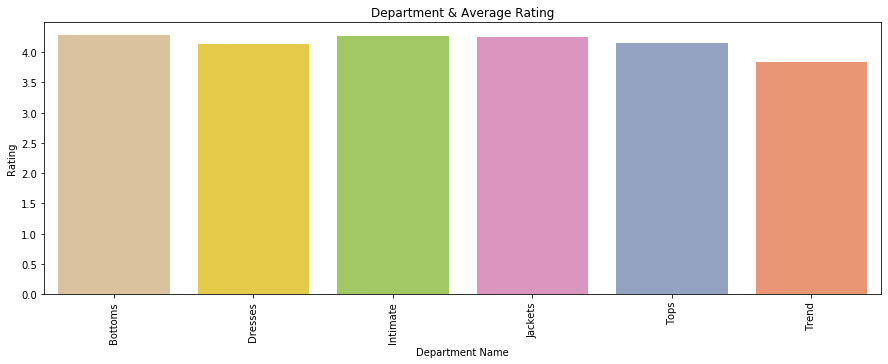

In [433]:
reco = df.groupby('Department Name', as_index=False).mean()[['Department Name','Rating']]
reco

plt.figure(figsize=(15,5))
plt.title("Department & Average Rating")
chart = sns.barplot(x='Department Name', y='Rating',data = reco,palette = "Set2_r")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

The scikit-learn library offers easy-to-use tools to perform both tokenization and feature extraction of your text data.

How to convert text to word count vectors with CountVectorizer.

Bag-of-Words Model
We cannot work with text directly when using machine learning algorithms.

Instead, we need to convert the text to numbers.

Algorithms take vectors of numbers as input, therefore we need to convert documents to fixed-length vectors of numbers.

This can be done by assigning each word a unique number. Then any document we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

Word Counts with CountVectorizer
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

Create an instance of the CountVectorizer class.
Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector.
Above two steps can be merged to one step

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

https://kavita-ganesan.com/how-to-use-countvectorizer/#Example-of-How-CountVectorizer-Works

 By default, CountVectorizer does the following:

- lowercases your text (set lowercase=false if you don’t want lowercasing)
- uses utf-8 encoding
- performs tokenization (converts raw text to smaller units of text)
- uses word level tokenization (meaning each word is treated as a separate token)
- ignores single characters during tokenization (say goodbye to words like ‘a’ and ‘I’)

The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead. 

The vectors returned from a call to transform() will be sparse vectors, and you can transform them back to numpy arrays to look and better understand what is going on by calling the toarray() function.hese vectors will contain a lot of zeros, we call them sparse.


The encoded vectors can then be used directly with a machine learning algorithm.


Now, the first thing you may want to do, is to eliminate stop words from your text as it has limited predictive power and may not help with downstream tasks such as text classification. Stop word removal is a breeze with CountVectorizer and it can be done in several ways:

- Use a custom stop word list that you provide
- Use sklearn’s built in English stop word list (not recommended)
- Create corpora specific stop words using max_df and min_df (highly recommended and will be covered later in this tutorial)

use of n-grams is for developing features for supervised Machine Learning models such as SVMs, MaxEnt models, Naive Bayes, etc.


In [99]:
#Adding the word counts to a dataframe is a very good practice because we might use these counts to reach some useful information. 
#To do this, I defined the function wordcounts.
# fill NA values by space
#df['Review Text'] = df['Review Text'].fillna('')

#create transform fn with CountVectorizer() class
vectorizer = CountVectorizer()

#Return a callable that handles preprocessing, tokenization and n-grams generation.
#build_analyzer() returns a callable that let's you extract the tokenizing step from the transformation pipeline wrapped in the CountVectorizer
#applies preprocessing, tokenization, remove stop words and creates n-grams.
analyze = vectorizer.build_analyzer()
# Eg : [u'this', u'is', u'text', u'document', u'to', u'analyze']

def count_of_words(x):
    a = {}
    # tokenize the string and continue, if it is not empty
    if analyze(x):
        b = {}
        
        # find counts of the vocabularies and transform to array 
        #Learn the vocabulary dictionary and return document-term matrix.
        #This is equivalent to fit followed by transform, but more efficiently implemented.
        c = vectorizer.fit_transform([x]).toarray()
        # vocabulary and index (index of w)
        d = vectorizer.vocabulary_
        # items() transforms the dictionary's (word, index) tuple pairs
        for y,z in d.items():
            b[z]=y # b -> index:word 
        for index,i in enumerate(c[0]):
            a[b[index]] = i # a -> word:count
    return  a

# add new column to the dataframe
df['Count of Words'] = df['Review Text'].apply(count_of_words)
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name                                     Count of Words  
0  Intimates  {'absolutely': 1, 'and': 2, 'comfortable': 1, ...  
1    Dresses  {'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...  
2    Dresses  {'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch...  
3      Pants  {'and': 1, 'but': 1, 'compliments': 1, 'every'...  
4    Blouses  {'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...

In [398]:
df.sample(10)

Age                                        Title  \
3190    46                                          NaN   
1789    30           So great - but quality not amazing   
4606    37                                     Cute top   
17972   44                                  Nice fabric   
9728    62                                Really great!   
20567   27  This top looks amazing on the model- not me   
7007    31                              Flowy and light   
12512   38                               Overwhelmed me   
20528   43      00 petite is way too short on the sides   
2848    23                      Pretty but poor quality   

                                             Review Text  Rating  \
3190   Retailer sleep pants are my favorite...the onl...       5   
1789   So, so cute. totally flattering. but the seams...       3   
4606   This top is cute, my kind of style, but it is ...       4   
17972  I really like this shirt. it runs somewhat big...       4   
9728   This is a beautiful dress! not too interested ...       5   
20567  I wanted to love this shirt. the fit was a lit...       2   
7007   This dress in orange is lovely. it's very ligh...       4   
12512  I am petite (5'). even the xsmall petite looke...       1   
20528  I ordered the black & white, 00 petite. i'm 5'...       2   
2848   When these shorts arrived i loved them and was...       3   

       Recommended IND  Positive Feedback Count   Division Name  \
3190                 1                        0       Initmates   
1789                 1                       27  General Petite   
4606                 1                        4       Initmates   
17972                1                        1         General   
9728                 1                        5  General Petite   
20567                0                        3  General Petite   
7007                 1                        0  General Petite   
12512                0                        5         General   
20528                0                        2         General   
2848                 0                        3         General   

      Department Name Class Name  Review Length  
3190         Intimate      Sleep            206  
1789          Dresses    Dresses            274  
4606         Intimate     Lounge            109  
17972            Tops      Knits            326  
9728          Dresses    Dresses            218  
20567            Tops      Knits            252  
7007          Dresses    Dresses            422  
12512         Dresses    Dresses            211  
20528            Tops    Blouses            500  
2848          Bottoms     Shorts            499

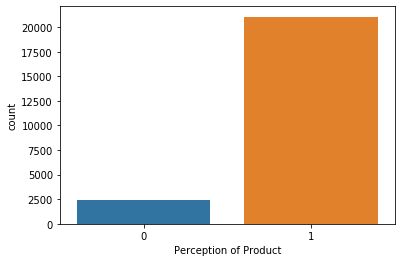

**Model Fitting Begins**

1. Split the data

In [122]:
X = vectorizer.fit_transform(df['Review Text'])

In [123]:
y = df['Perception of Product']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)
print('Train/Test Size : ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train/Test Size :  (17604, 14145) (5868, 14145) (17604,) (5868,)


In [120]:
#IGNORE

# split data
train_data,test_data = train_test_split(df,train_size=0.75,random_state=12)

#The text must be parsed to remove words, called tokenization. Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called feature extraction (or vectorization).
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['Perception of Product']
X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['Perception of Product']

**Logistic Regression**

In [141]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
predicted_logreg= lr.predict_proba(X_test)
predicted_logreg
probs_lr = predicted_logreg[:, 1]

In [200]:
round(lr.score(X_test,y_test)*100,2)# Testing the accuracy

90.71

**Lasso Regression**

FIX THIS

In [201]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [158]:
round(lasso.score(X_test,y_test)*100,2)# Testing the accuracy

-0.03

**Multinomial Naive Bayes**

The general term Naive Bayes refers the the strong independence assumptions in the model, rather than the particular distribution of each feature.

Multinomial Naive Bayes classifier is a specific instance of a Naive Bayes classifier which uses a multinomial distribution for each of the features.


In [231]:
nb = MultinomialNB() # Use binary and not multinom
nb.fit(X_train,y_train)
predicted_nb = nb.predict_proba(X_test)
probs_nb = predicted_nb[:, 1]

In [203]:
round(nb.score(X_test,y_test)*100,2)

90.32

**SVM**


In [233]:
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [234]:
predicted_svc = svclassifier.predict_(X_test)
predicted_svc
probs_svc = predicted_svc[:, 1]

AttributeError: predict_proba is not available when  probability=False

In [163]:
round(svclassifier.score(X_test,y_test)*100,2)

89.31

**Random Forest**

In [206]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [209]:
predicted_rforest = rforest.predict_proba(X_test)
predicted_rforest
probs_rf = predicted_rforest[:, 1]

In [173]:
round(rforest.score(X_test,y_test)*100,2)

89.55

**Confusion Matrix**

In [182]:
#Logistic Regression
print(confusion_matrix(y_test,predicted_logreg))
print(classification_report(y_test, predicted_logreg))

[[ 248  379]
 [ 166 5075]]
              precision    recall  f1-score   support

           0       0.60      0.40      0.48       627
           1       0.93      0.97      0.95      5241

    accuracy                           0.91      5868
   macro avg       0.76      0.68      0.71      5868
weighted avg       0.90      0.91      0.90      5868



In [184]:
#NB Regression
print(confusion_matrix(y_test,predicted_nb))
print(classification_report(y_test, predicted_nb))

[[ 293  334]
 [ 234 5007]]
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       627
           1       0.94      0.96      0.95      5241

    accuracy                           0.90      5868
   macro avg       0.75      0.71      0.73      5868
weighted avg       0.90      0.90      0.90      5868



In [186]:
#SVC Regression
print(confusion_matrix(y_test,predicted_svc))
print(classification_report(y_test, predicted_svc))

[[   0  627]
 [   0 5241]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.89      1.00      0.94      5241

    accuracy                           0.89      5868
   macro avg       0.45      0.50      0.47      5868
weighted avg       0.80      0.89      0.84      5868



In [187]:
#Random Forest classification 
print(confusion_matrix(y_test,predicted_rforest))
print(classification_report(y_test, predicted_rforest))

[[  46  581]
 [  32 5209]]
              precision    recall  f1-score   support

           0       0.59      0.07      0.13       627
           1       0.90      0.99      0.94      5241

    accuracy                           0.90      5868
   macro avg       0.74      0.53      0.54      5868
weighted avg       0.87      0.90      0.86      5868



ROC Curve

In [229]:
#Custom ROC fn

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label="AUC:%.2f" % (auc), linewidth=2, c='orange')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

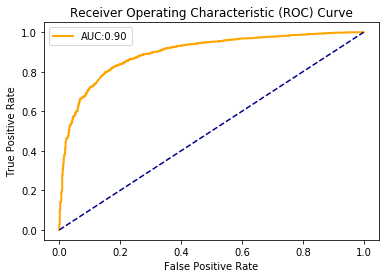

In [228]:
#LR Roc Curve
fpr, tpr, thresholds = roc_curve(y_test, probs_lr)
auc = roc_auc_score(y_test, probs_lr)
plot_roc_curve(fpr, tpr)

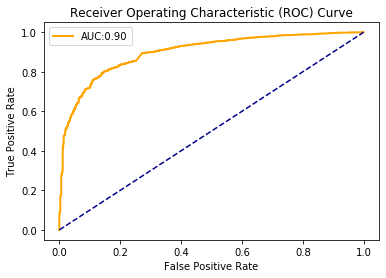

In [232]:
#NB Roc Curve
fpr, tpr, thresholds = roc_curve(y_test, probs_nb)
auc = roc_auc_score(y_test, probs_nb)
plot_roc_curve(fpr, tpr)

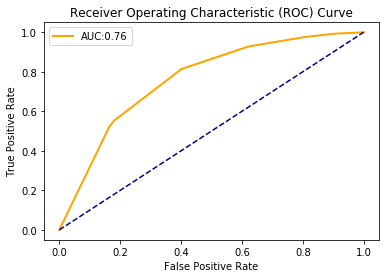

In [225]:
#RF ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, probs_rf)
auc = roc_auc_score(y_test, probs_rf)
plot_roc_curve(fpr, tpr)

In [252]:
# Defining a sentiment analyser function
def sentiment_analyser(text):
    return text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment.polarity))

In [253]:
# Applying function to reviews
df['Polarity'] = sentiment_analyser(df['Review Text'])
df.head(10)

Clothing ID  Age                                 Title  \
0          767   33                                   NaN   
1         1080   34                                   NaN   
2         1077   60               Some major design flaws   
3         1049   50                      My favorite buy!   
4          847   47                      Flattering shirt   
5         1080   49               Not for the very petite   
6          858   39                  Cagrcoal shimmer fun   
7          858   39  Shimmer, surprisingly goes with lots   
8         1077   24                            Flattering   
9         1077   34                     Such a fun dress!   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
5  I love tracy reese dresses, but this one is no...       2                0   
6  I aded this in my basket at hte last mintue to...       5                1   
7  I ordered this in carbon for store pick up, an...       4                1   
8  I love this dress. i usually get an xs but it ...       5                1   
9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   
5                        4         General         Dresses    Dresses   
6                        1  General Petite            Tops      Knits   
7                        4  General Petite            Tops      Knits   
8                        0         General         Dresses    Dresses   
9                        0         General         Dresses    Dresses   

   Polarity  
0  0.633333  
1  0.339583  
2  0.073675  
3  0.550000  
4  0.512891  
5  0.178750  
6  0.133750  
7  0.171635  
8  0.002500  
9  0.204200

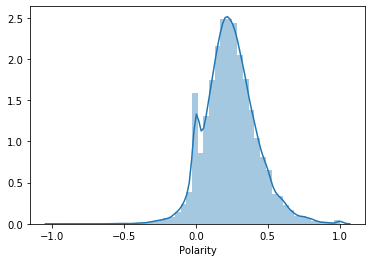

In [258]:
sns.distplot(df['Polarity']);

In [263]:
sam = df.loc[df.Polarity == 1,['Review Text']].sample(3).values #Positive
sam

array([['These are so comfy! mom of two boys on the go! great for running around and then can be dressed up for a night out on the town! not mom jeans!'],
       ['Perfect for lunch with the girls, pta, or saturdays with the family. this skirt is a perfect addition to your fall wardrobe.'],
       ['Perfect way to add warmth in transition weather']], dtype=object)

In [264]:
sam = df.loc[df.Polarity == 0.5,['Review Text']].sample(3).values #Neutral
sam

array([['These leggings are gorgeous. soft suede feel, perfect fit, great look, especially for dressing up and going out. love them.'],
       ["I've received so many complements on this top. it's so comfortable and every time i wear it someone compliments the color. i ordered it in each color!"],
       ['Nice print and comfortable shirt.']], dtype=object)

In [265]:
sam = df.loc[df.Polarity <0,['Review Text']].sample(3).values #Neutral
sam

array([['Love the pilcro brand, they are one of my favorites, even compared to other more expensive denim brands. i ordered my usual two sizes smaller and found they did not fit this time! i probably should have ordered one size smaller than my usual in this cut. sadly, i have to send these beauties back and hope for a pop-back.'],
       ["Ranna designs richly detailed dresses and this is no exception.  looks just like the pictures (colors/cut/drape) with the exception of a modesty hook at the deep v-neck.  sleeves are sheer with an elastic cuff.  this dress does not stretch--the bodice felt very fitted and tight, especially at the waist band.  runs tts or small; if you're busty/broad shouldered, size up.  it has a dreadful side zip, is fully lined and all synthetic fabric (boo!)  i purchased size 10p, my stats 36c/38-27-35/135#."],
       ["I ordered these pants in my usual size (xl) and was shocked when i received them. the waist was huge and there was nothing in the way of an elast

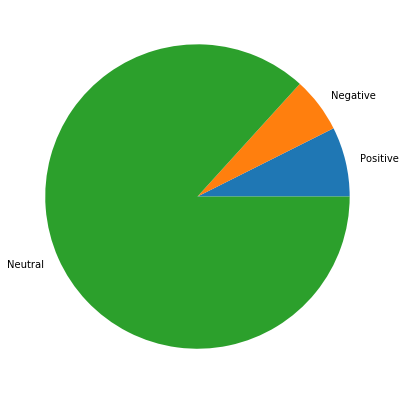

In [269]:
#Change chart type

negative = (len(df.loc[df.Polarity <0,['Review Text']].values)/len(df))*100
positive = (len(df.loc[df.Polarity >0.5,['Review Text']].values)/len(df))*100
neutral  = len(df.loc[df.Polarity >0 ,['Review Text']].values) - len(df.loc[df.Polarity >0.5 ,['Review Text']].values)
neutral = neutral/len(df)*100
plt.figure(figsize =(10, 7)) 
plt.pie([positive,negative,neutral], labels = ['Positive','Negative','Neutral']) ;

In [285]:
#Word Cloud
import matplotlib as mpl
#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=12
                         ).generate(str(df['Review Text']))

print(wordcloud);

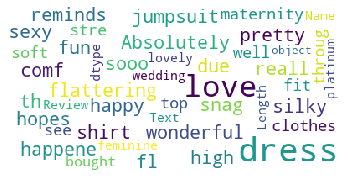

In [284]:
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [290]:
dress_mask = np.array(Image.open("dress.png"))
dress_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [293]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [295]:
transformed_dress_mask = np.ndarray((dress_mask.shape[0],dress_mask.shape[1]), np.int32)

for i in range(len(dress_mask)):
    transformed_dress_mask[i] = list(map(transform_format, dress_mask[i]))
    
transformed_dress_mask

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [297]:
df.describe().T.drop("count",axis=1)

mean         std     min         25%  \
Clothing ID              918.118709  203.298980   0.000  861.000000   
Age                       43.198544   12.279544  18.000   34.000000   
Rating                     4.196032    1.110031   1.000    4.000000   
Recommended IND            0.822362    0.382216   0.000    1.000000   
Positive Feedback Count    2.535936    5.702202   0.000    0.000000   
Polarity                   0.240835    0.179603  -0.975    0.125505   
Review Length            297.689602  152.363034   3.000  173.000000   

                               50%          75%     max  
Clothing ID              936.00000  1078.000000  1205.0  
Age                       41.00000    52.000000    99.0  
Rating                     5.00000     5.000000     5.0  
Recommended IND            1.00000     1.000000     1.0  
Positive Feedback Count    1.00000     3.000000   122.0  
Polarity                   0.23245     0.345229     1.0  
Review Length            292.00000   451.000000   508.0

In [299]:
df[["Title"]].describe(include=["O"]).T.drop("count",axis=1)

unique       top freq
Title        13993  Love it!  136
Review Text  22635       nan  845

In [411]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read input file, note the encoding is specified here 
# It may be different in your text file

# Stopwords
stopwords = set(line.strip() for line in open('df['Title']'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

FileNotFoundError: [Errno 2] No such file or directory: 'stopwords.txt'

In [313]:
from collections import Counter 
Counter = Counter(df['Title']) 
most_occur = Counter.most_common(4) 
print(most_occur) 

[(nan, 3810), ('Love it!', 136), ('Beautiful', 95), ('Love', 88)]
